In [ ]:
import numpy as np
import igraph as ig
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
from collections import deque

In [86]:

def reachable_nodes(graph, subset):
    """
    Find the nodes reachable from the subset of nodes in a graph using BFS.

    Parameters:
    graph (dict): The graph represented as a dictionary where the keys are the nodes and the values are lists of adjacent nodes.
    subset (set): The subset of nodes to start the traversal from.

    Returns:
    set: The set of nodes reachable from the subset of nodes.
    """
    visited = set(subset)
    queue = deque(subset)
    while queue:
        node = queue.popleft()
        print(node)
        node = int(node)

        for neighbor in graph[node]:
            if neighbor not in visited and neighbor != 0:
                visited.add(neighbor)
                queue.append(neighbor)
    return visited


In [87]:
class IC():
    def __init__(self,A) -> None:
        self.A=A
        self.A_ = None
    def generate_istance(self):
        self.A_ = np.zeros_like(self.A)
        # for each (i,j) in A_ put 1 with probability A[i,j], do not use for loops
        self.A_[np.random.rand(*self.A.shape)<self.A]=1
    
    def simulate_run(self,seed):
        self.generate_istance()
        reached = reachable_nodes(self.A_,seed)
        return len(reached)

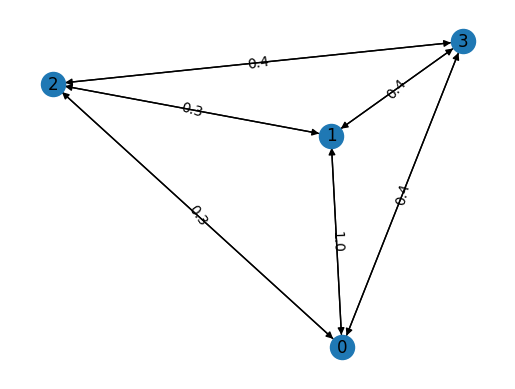

In [88]:
A = np.array(
   [[0,0.1,0.1,0.1],
    [1,0,1,1],
    [0.3,0.3,0,0.3],
    [0.4,0.4,0.4,0]]
)
# show the graph using networkx,plot as directed graph
G = nx.DiGraph(A)
pos = nx.spring_layout(G)
# show edge weights
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G,pos,with_labels=True)



In [89]:
K = 3
ic = IC(A)
S = []
n_iter = 1_000
for i in range(K):
    vals = np.zeros(len(A))
    for j in range(len(A)):
        if j in S:
            continue
        for _ in range(n_iter):
            S.append(j)
            vals[j]+=ic.simulate_run(S)
            S.pop()
    print(vals)
    S.append(np.argmax(vals))

S


0
0
0
0
0
1.0
0
0
0
1.0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
1.0
0
0
1.0
0
1.0
0
0
0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
1.0
0
0
0
1.0
0
1.0
0
1.0
0
0
0
0
0
0
1.0
0
0
1.0
0
0
0
0
0
0
0
1.0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
1.0
0
0
0
0
0
0
0
1.0
0
0
0
0
1.0
0
1.0
0
0
0
1.0
0
1.0
0
0
0
1.0
0
0
0
0
0
1.0
0
0
1.0
0
1.0
0
1.0
0
0
0
0
1.0
0
1.0
0
0
0
1.0
0
1.0
0
0
1.0
0
0
0
0
0
1.0
0
0
1.0
0
0
1.0
0
0
0
0
0
0
0
0
1.0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
1.0
0
1.0
0
0
0
0
0
1.0
0
0
0
1.0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
0
0
0
1.0
0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
1.0
0
0
1.0
0
1.0
0
0
0
0
0
0
1.0
0
0
0
1.0
0
1.0
0
0
0
0
0
0
1.0
0
1.0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
0
1.0
0
0
1.0
0
0
0
0
0
1.0
0
0
1.0
0
1.0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
1.0
0
0
1.0
0
0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
0
0
1.0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
1.0
0
1.0
0


[3, 2, 0]